# Data analysis

#### Imports

In [30]:
#sql
import mysql.connector
from mysql.connector import Error
import pymysql

#dataframe
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [31]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='mysql',
                             db='mydb')

In [32]:
cursor = connection.cursor()
cursor.execute("USE mydb")
cursor.execute("SHOW TABLES")
for x in cursor:
    print(x)

('attribute',)
('punk',)
('punk_attribute_relation',)
('skin',)
('transaction',)
('type',)


### Types of punks

In [33]:
try:
    query = """SELECT id, type_id  
               FROM punk;"""
    df_type = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [34]:
df_type.head(3)

,id,type_id
0,635,0
1,2890,0
2,3100,0


In [35]:
data = df_type.groupby(['type_id']).count()
data['type'] = data.index
data.head(3)

,id,type
type_id,,
0,9,0
1,24,1
2,88,2


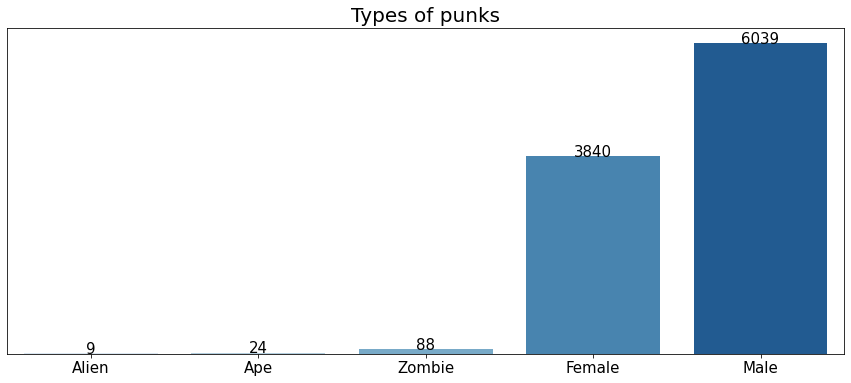

In [36]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="type", y="id", data=data, palette="Blues")

a.set_xticklabels(['Alien','Ape','Zombie','Female','Male'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.type, row.id, row.id, color='black', ha="center",fontsize=15)

plt.title("Types of punks",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('6.png')
plt.show(a)

### Skins of punks

In [37]:
try:
    query = """SELECT id, skin_id FROM punk;"""
    df_skin = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [38]:
df_skin.head(3)

,id,skin_id
0,635,0
1,2890,0
2,3100,0


In [39]:
data = df_skin.groupby(['skin_id']).count()
data['skin'] = data.index
data

,id,skin
skin_id,,
0,9,0
1,24,1
2,88,2
3,1018,3
4,2824,4
5,3006,5
6,3031,6


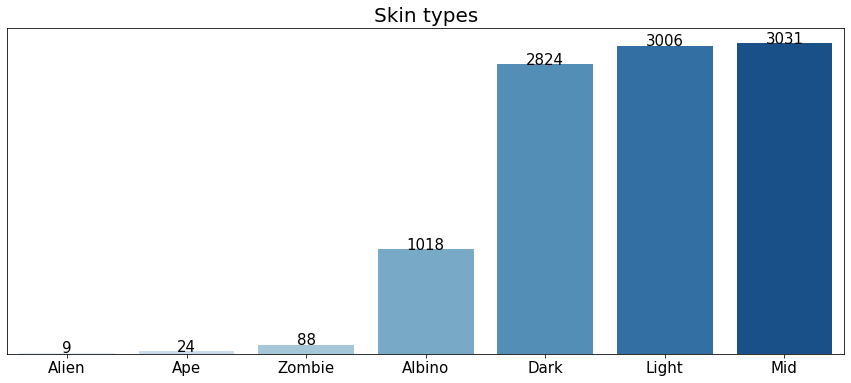

In [40]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="skin", y="id", data=data, palette="Blues")

a.set_xticklabels(['Alien','Ape','Zombie','Albino','Dark','Light','Mid'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.skin, row.id, row.id, color='black', ha="center",fontsize=15)

plt.title("Skin types",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('7.png')
plt.show(a)

### Attributes of punks

In [41]:
try:
    query = """SELECT punk_id, attribute_id FROM punk_attribute_relation;"""
    df_att = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [42]:
df_att.head(3)

,punk_id,attribute_id
0,1,34
1,1,67
2,2,70


In [43]:
data = df_att.groupby(['punk_id']).size()
data = data.to_frame()
data.columns = ['total']

data = data.groupby(['total']).size()
data = data.to_frame()
data.columns = ['total']
data['att'] = data.index

new_row = {'total':8, 'att':0}
data = data.append(new_row, ignore_index=True)

data = data.sort_values(by=['att'])
data

,total,att
7,8,0
0,333,1
1,3560,2
2,4501,3
3,1420,4
4,166,5
5,11,6
6,1,7


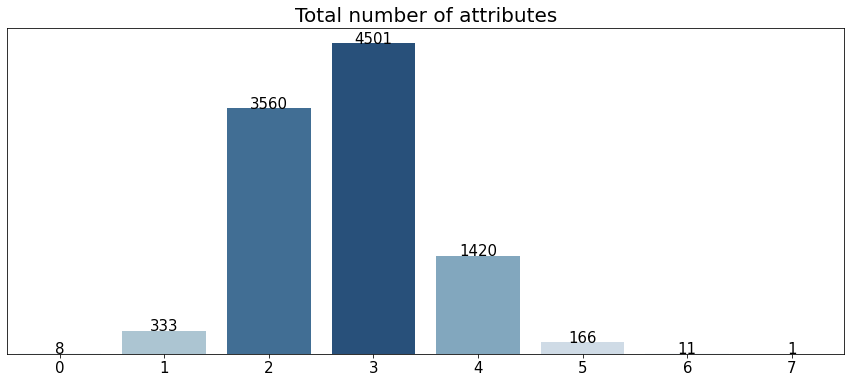

In [44]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="att", y="total", data=data, 
                palette=(["#F7FBFF","#A6C7D8","#336FA2","#1A5088",
                            "#78AAC8", "#CBDBEA","#F7FBFF","#F7FBFF"]))

a.set_xticklabels(['0','1','2','3','4','5','6','7'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.att, row.total, row.total, color='black', ha="center",fontsize=15)

plt.title("Total number of attributes",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('8.png')
plt.show(a)

### Average price by type

In [45]:
try:
    query = """SELECT type, date, amount, punk_id 
    FROM transaction;"""
    df_price_type = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [46]:
df_price_type.head(3)

,type,date,amount,punk_id
0,Bid,2021-09-01,321.0,0
1,Bid Withdrawn,2021-09-01,320.0,0
2,Bid,2021-09-01,320.0,0


In [47]:
#how many punks are there? 10000 good
len(df_price_type['punk_id'].unique())

10000

In [48]:
#locate all transaction sold
a = df_price_type.loc[df_price_type['type'] == 'Sold']
len(a['punk_id'])

19702

In [49]:
#keep only first item for each punk
b = a.drop_duplicates(subset=['punk_id'], keep='first')
len(b['punk_id'])

6500

In [50]:
b.head(3)

,type,date,amount,punk_id
21,Sold,2018-11-30,25.0,0
51,Sold,2020-11-30,60.0,1
305,Sold,2018-12-07,2.5,14


In [51]:
#only claimed
c = df_price_type.loc[(df_price_type['amount'] == 0) & (df_price_type['type'] == 'Claimed')]
len(c['punk_id'].unique())

10000

In [52]:
c.head(3)

,type,date,amount,punk_id
39,Claimed,2017-06-23,0.0,0
102,Claimed,2017-06-23,0.0,1
132,Claimed,2017-06-23,0.0,2


In [53]:
df_price_type = pd.concat([b, c], ignore_index=True)
df_price_type = df_price_type.sort_values(by=['punk_id','date'])
df_price_type = df_price_type.reset_index(drop=True)
df_price_type.tail(3)

,type,date,amount,punk_id
16497,Claimed,2017-06-23,0.0,9998
16498,Sold,2021-08-11,110.0,9998
16499,Claimed,2017-06-23,0.0,9999


In [54]:
#keep only first item for each punk
df_price_type = df_price_type.drop_duplicates(subset=['punk_id'], keep='last')
len(df_price_type['punk_id'])

10000

In [55]:
try:
    query = """SELECT id, type_id, skin_id FROM punk;"""
    df_punk = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [56]:
df_punk.head(3)

,id,type_id,skin_id
0,0,3,6
1,1,4,4
2,2,3,5


In [57]:
df_punk.isnull().sum()

id         0
type_id    0
skin_id    0
dtype: int64

In [58]:
df_punk = df_punk.sort_values(by=['id'])
df_punk = df_punk.reset_index(drop=True)
df_punk.head(3)

,id,type_id,skin_id
0,0,3,6
1,1,4,4
2,2,3,5


In [59]:
df_punk = df_punk.rename(columns={'id':'punk_id'})
df_punk.head()

,punk_id,type_id,skin_id
0,0,3,6
1,1,4,4
2,2,3,5
3,3,4,4
4,4,4,6


In [60]:
df_price_type = pd.merge(df_price_type, df_punk, on=["punk_id"])
df_price_type.head(3)

,type,date,amount,punk_id,type_id,skin_id
0,Sold,2018-11-30,25.0,0,3,6
1,Sold,2020-11-30,60.0,1,4,4
2,Claimed,2017-06-23,0.0,2,3,5


In [61]:
data = df_price_type.groupby(['type_id']).mean()
data['type'] = data.index
data

,amount,punk_id,skin_id,type
type_id,,,,
0,1004.555556,4801.222222,0.000000,0
1,321.491250,4830.291667,1.000000,1
2,177.537045,5280.602273,2.000000,2
3,27.654885,4915.416146,4.800260,3
4,33.098354,5049.837887,4.824143,4


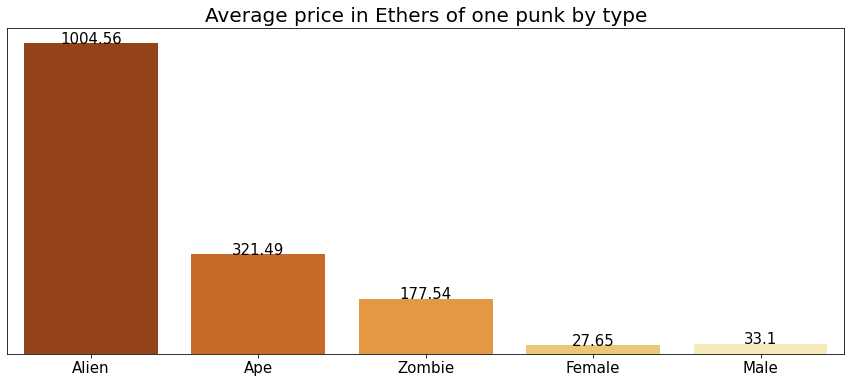

In [62]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="type", y="amount", data=data, palette="YlOrBr_r")

a.set_xticklabels(['Alien','Ape','Zombie','Female','Male'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.type, row.amount,round(row.amount,2), color='black', ha="center",fontsize=15)

plt.title("Average price in Ethers of one punk by type",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('9.png')
plt.show(a)

### Average price by skin

In [63]:
data = df_price_type.groupby(['skin_id']).mean()
data['skin'] = data.index
data

,amount,punk_id,type_id,skin
skin_id,,,,
0,1004.555556,4801.222222,0.000000,0
1,321.491250,4830.291667,1.000000,1
2,177.537045,5280.602273,2.000000,2
3,31.734381,5176.261297,3.587426,3
4,30.569593,4933.063031,3.610127,4
5,32.024558,5043.211910,3.619095,5
6,30.081085,4952.448037,3.612669,6


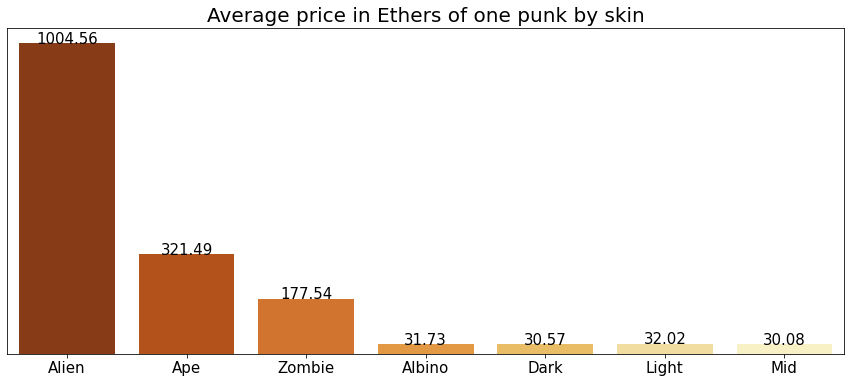

In [64]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="skin", y="amount", data=data, palette="YlOrBr_r")

a.set_xticklabels(['Alien','Ape','Zombie','Albino','Dark','Light','Mid'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.skin, row.amount,round(row.amount,2), color='black', ha="center",fontsize=15)

plt.title("Average price in Ethers of one punk by skin",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('10.png')
plt.show(a)

### Average price by attribute

In [65]:
try:
    query = """SELECT punk_id, attribute_id FROM punk_attribute_relation;"""
    df_att = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [66]:
df = df_punk.sort_values(by=['punk_id'])
df = df_punk.reset_index(drop=True)
df.head()

,punk_id,type_id,skin_id
0,0,3,6
1,1,4,4
2,2,3,5
3,3,4,4
4,4,4,6


In [67]:
df_att.head()

,punk_id,attribute_id
0,1,34
1,1,67
2,2,70
3,3,70
4,3,80


In [68]:
df_dummies = pd.get_dummies(df_att, columns=['attribute_id'])
df_dummies.head(3)

,punk_id,attribute_id_0,attribute_id_1,attribute_id_2,attribute_id_3,attribute_id_4,attribute_id_5,attribute_id_6,attribute_id_7,attribute_id_8,...,attribute_id_77,attribute_id_78,attribute_id_79,attribute_id_80,attribute_id_81,attribute_id_82,attribute_id_83,attribute_id_84,attribute_id_85,attribute_id_86
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df_attributes = df_dummies.groupby(['punk_id']).count()
df_attributes = df_attributes[['attribute_id_0']]
df_attributes['punk_id'] = df_attributes.index
df_attributes = df_attributes.rename(columns={'attribute_id_0':'total_att'})
df_attributes = df_attributes.reset_index(drop=True)
df_attributes.head(3)

,total_att,punk_id
0,3,0
1,2,1
2,1,2


In [70]:
len(df_attributes)

9992

In [71]:
new_row = {'total_att':0, 'punk_id':281}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':510}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':641}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':741}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':1050}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':2204}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':3307}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':6487}
df_attributes = df_attributes.append(new_row, ignore_index=True)
len(df_attributes)

10000

In [72]:
len(df_attributes['punk_id'].unique())

10000

In [73]:
df_price_type.head()

,type,date,amount,punk_id,type_id,skin_id
0,Sold,2018-11-30,25.0,0,3,6
1,Sold,2020-11-30,60.0,1,4,4
2,Claimed,2017-06-23,0.0,2,3,5
3,Claimed,2017-06-23,0.0,3,4,4
4,Claimed,2017-06-23,0.0,4,4,6


In [74]:
df_price = pd.merge(df_attributes, df_price_type, on=["punk_id"])
df_price.head(5)

,total_att,punk_id,type,date,amount,type_id,skin_id
0,3,0,Sold,2018-11-30,25.0,3,6
1,2,1,Sold,2020-11-30,60.0,4,4
2,1,2,Claimed,2017-06-23,0.0,3,5
3,3,3,Claimed,2017-06-23,0.0,4,4
4,4,4,Claimed,2017-06-23,0.0,4,6


In [75]:
data = df_price.groupby(['total_att']).mean()
data['total_att'] = data.index
data

,punk_id,amount,type_id,skin_id,total_att
total_att,,,,,
0,1902.625000,95.628750,3.500000,4.500000,0
1,2479.561562,47.336216,3.357357,4.378378,1
2,4382.905337,33.775444,3.571629,4.690449,2
3,5454.828927,33.333959,3.604310,4.838480,3
4,5643.367606,30.231014,3.621127,4.876761,4
5,5561.036145,45.206687,3.662651,4.897590,5
6,4881.363636,103.063636,3.454545,4.727273,6
7,8348.000000,85.000000,4.000000,6.000000,7


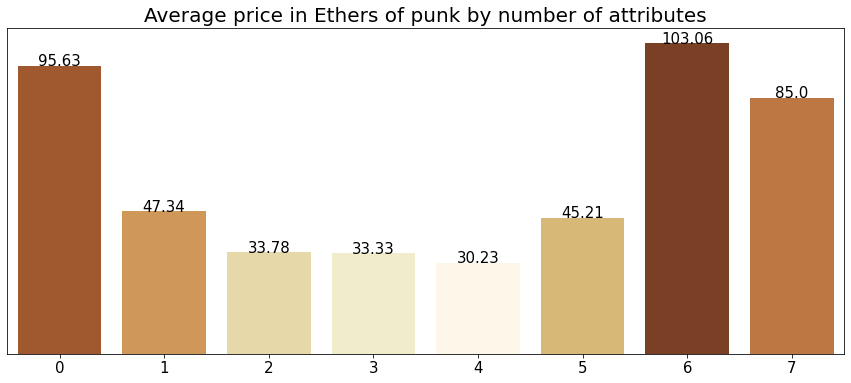

In [76]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="total_att", y="amount", data=data,
                palette=(["#B3531B",
                          "#E39844",
                          "#F1DDA0",
                          "#F7F1C5",
                          "#FFF9E5", 
                          "#E8BD66",
                          "#873B17",
                          "#D1742F"]))

a.set_xticklabels(['0','1','2','3','4','5','6','7'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.total_att, row.amount,round(row.amount,2), color='black', ha="center",fontsize=15)

plt.title("Average price in Ethers of punk by number of attributes",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('11.png')
plt.show(a)

### Punks available by types

In [77]:
try:
    query = """SELECT type, date, amount, punk_id, type_id, skin_id
    FROM transaction
    INNER JOIN punk ON punk.id=transaction.punk_id;"""
    df_available = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [78]:
df_available.head()

,type,date,amount,punk_id,type_id,skin_id
0,Bid,2021-09-01,321.0,0,3,6
1,Bid Withdrawn,2021-09-01,320.0,0,3,6
2,Bid,2021-09-01,320.0,0,3,6
3,Bid Withdrawn,2021-09-01,263.0,0,3,6
4,Bid,2021-08-29,263.0,0,3,6


In [79]:
#locate all transaction sold
a = df_available.loc[df_available['type'] == 'Offered']
len(a)

71062

In [80]:
#keep only first item for each punk
b = a.drop_duplicates(subset=['punk_id'], keep='first')
len(b['punk_id'])

7013

In [81]:
data = b.groupby(['type_id']).count()
data['type_id'] = data.index
data

,type,date,amount,punk_id,skin_id,type_id
type_id,,,,,,
0,6,6,6,6,6,0
1,18,18,18,18,18,1
2,52,52,52,52,52,2
3,2482,2482,2482,2482,2482,3
4,4455,4455,4455,4455,4455,4


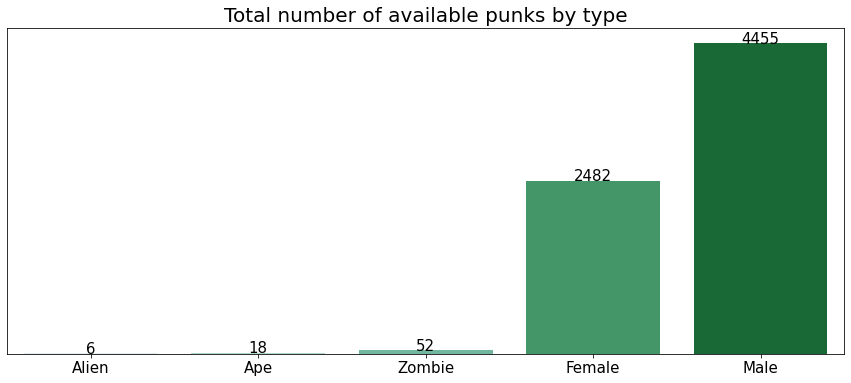

In [82]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="type_id", y="amount", data=data, palette="BuGn")

a.set_xticklabels(['Alien','Ape','Zombie','Female','Male'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.type_id, row.amount,row.amount, color='black', ha="center",fontsize=15)

plt.title("Total number of available punks by type",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('12.png')
plt.show(a)

### Punks available by skin

In [83]:
data = b.groupby(['skin_id']).count()
data['skin_id'] = data.index
data

,type,date,amount,punk_id,type_id,skin_id
skin_id,,,,,,
0,6,6,6,6,6,0
1,18,18,18,18,18,1
2,52,52,52,52,52,2
3,638,638,638,638,638,3
4,2019,2019,2019,2019,2019,4
5,2145,2145,2145,2145,2145,5
6,2135,2135,2135,2135,2135,6


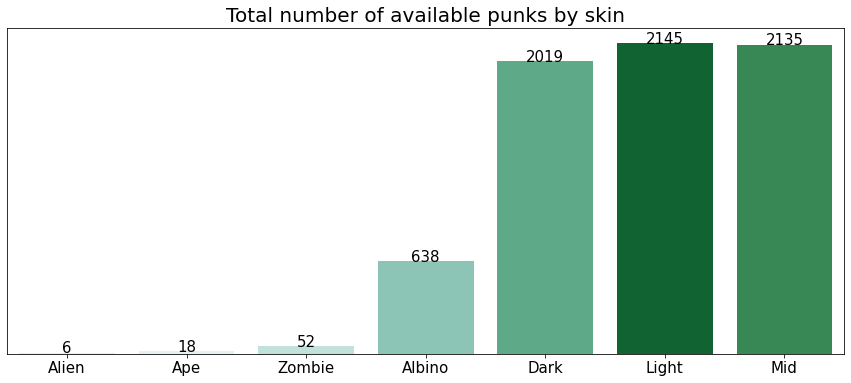

In [84]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="skin_id", y="amount", data=data, 
                palette=(["#E1F3F6",
                          "#E1F3F6",
                          "#BDE6DD",
                          "#83CEB9",
                          "#51B689", 
                          "#04712F",
                          "#2B9553"]))

a.set_xticklabels(['Alien','Ape','Zombie','Albino','Dark','Light','Mid'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.skin_id, row.amount,row.amount, color='black', ha="center",fontsize=15)

plt.title("Total number of available punks by skin",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('13.png')
plt.show(a)

### Punks available by attribute

In [85]:
try:
    query = """SELECT type, date, amount, punk_id 
    FROM transaction
    WHERE type='Offered';"""
    df_offered = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [86]:
df_offered.tail()

,type,date,amount,punk_id
71057,Offered,2020-10-26,10.50,8998
71058,Offered,2020-10-12,29.99,8998
71059,Offered,2020-10-06,12.00,8998
71060,Offered,2018-05-29,0.10,8998
71061,Offered,2017-07-21,6.50,8999


In [87]:
#keep only first item for each punk
df_offered = df_offered.drop_duplicates(subset=['punk_id'], keep='first')
len(df_offered['punk_id'])

7013

In [88]:
df_attributes.head()

,total_att,punk_id
0,3,0
1,2,1
2,1,2
3,3,3
4,4,4


In [89]:
df_offered = pd.merge(df_attributes, df_offered, on=["punk_id"])
df_offered.head(5)

,total_att,punk_id,type,date,amount
0,3,0,Offered,2018-09-12,100.00
1,2,1,Offered,2020-11-25,79.50
2,3,14,Offered,2021-09-14,667.00
3,2,53,Offered,2021-08-03,129.99
4,1,89,Offered,2021-03-16,890.00


In [90]:
data = df_offered.groupby(['total_att']).count()
data['total_att'] = data.index
data

,punk_id,type,date,amount,total_att
total_att,,,,,
0,7,7,7,7,0
1,125,125,125,125,1
2,2458,2458,2458,2458,2
3,3310,3310,3310,3310,3
4,996,996,996,996,4
5,110,110,110,110,5
6,6,6,6,6,6
7,1,1,1,1,7


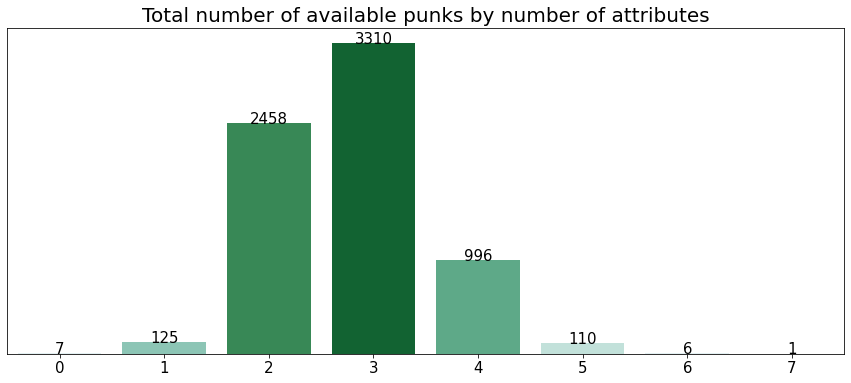

In [91]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="total_att", y="amount", data=data,
                palette=(["#E1F3F6","#83CEB9","#2B9553","#04712F",
                            "#51B689", "#BDE6DD","#E1F3F6","#E1F3F6"]))

a.set_xticklabels(['0','1','2','3','4','5','6','7'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.total_att, row.amount,round(row.amount,2), color='black', ha="center",fontsize=15)

plt.title("Total number of available punks by number of attributes",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('14.png')
plt.show(a)

### Average rarest rank of punk character by type

In [92]:
try:
    query = """SELECT id, type_id, rarest_rank FROM punk;"""
    df_rank_type = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [93]:
df_rank_type.head()

,id,type_id,rarest_rank
0,0,3,2118
1,1,4,4337
2,2,3,7995
3,3,4,7834
4,4,4,7189


In [94]:
data = df_rank_type.groupby(['type_id']).mean()
data['type'] = data.index
data

,id,rarest_rank,type
type_id,,,
0,4801.222222,6.444444,0
1,4830.291667,31.291667,1
2,5280.602273,97.477273,2
3,4915.416146,4356.071354,3
4,5049.837887,5508.908594,4


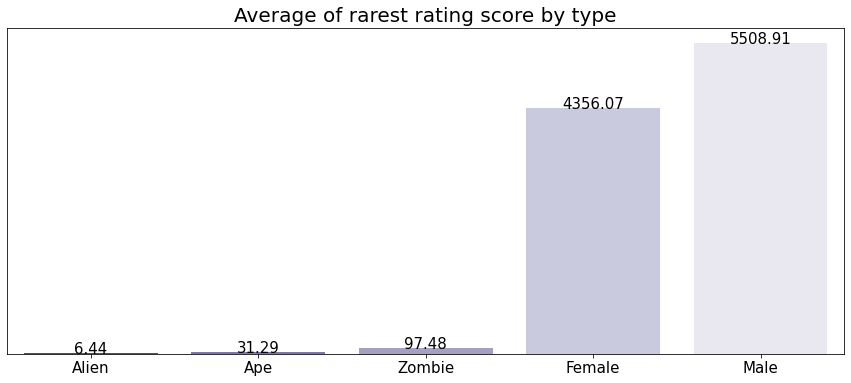

In [95]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="type", y="rarest_rank", data=data, palette="Purples_r")

a.set_xticklabels(['Alien','Ape','Zombie','Female','Male'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.type, row.rarest_rank, round(row.rarest_rank,2), color='black', ha="center",fontsize=15)

plt.title("Average of rarest rating score by type",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('15.png')
plt.show(a)

### Average rarest rank of punk character by skin

In [96]:
try:
    query = """SELECT id, skin_id, rarest_rank FROM punk;"""
    df_rank_skin = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [97]:
df_rank_skin.head()

,id,skin_id,rarest_rank
0,0,6,2118
1,1,4,4337
2,2,5,7995
3,3,4,7834
4,4,6,7189


In [98]:
data = df_rank_skin.groupby(['skin_id']).mean()
data['skin'] = data.index
data

,id,rarest_rank,skin
skin_id,,,
0,4801.222222,6.444444,0
1,4830.291667,31.291667,1
2,5280.602273,97.477273,2
3,5176.261297,5290.792731,3
4,4933.063031,5028.281516,4
5,5043.211910,5046.019960,5
6,4952.448037,5028.499835,6


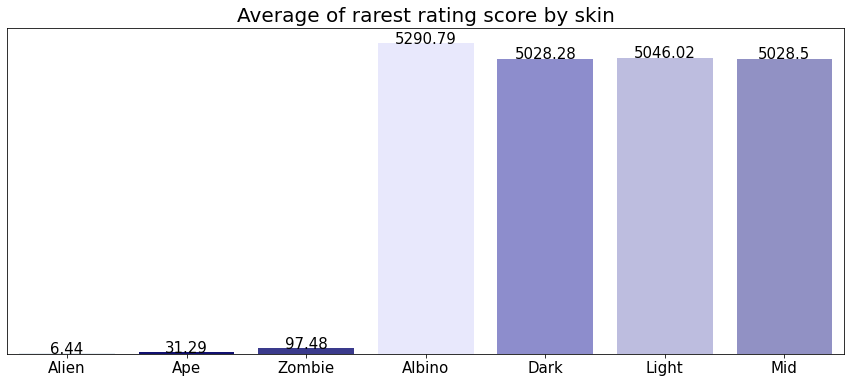

In [99]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="skin", y="rarest_rank", data=data,
                palette=(["#E4EDF5",
                          "#010080",
                          "#2D2D99",
                          "#E5E5FF",
                          "#8282D6", 
                          "#B7B7E5",
                          "#8989CC"]))

a.set_xticklabels(['Alien','Ape','Zombie','Albino','Dark','Light','Mid'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.skin, row.rarest_rank, round(row.rarest_rank,2), color='black', ha="center",fontsize=15)

plt.title("Average of rarest rating score by skin",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('16.png')
plt.show(a)

### Average rarest rank of punk character by attribute

In [100]:
df_attributes.head()

,total_att,punk_id
0,3,0
1,2,1
2,1,2
3,3,3
4,4,4


In [101]:
len(df_attributes['punk_id'].unique())

10000

In [102]:
try:
    query = """SELECT id, rarest_rank FROM punk;"""
    df_rank = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [103]:
df_rank.head()

,id,rarest_rank
0,0,2118
1,1,4337
2,2,7995
3,3,7834
4,4,7189


In [104]:
df_rank = df_rank.rename(columns={'id':'punk_id'})
df_rank.head()

,punk_id,rarest_rank
0,0,2118
1,1,4337
2,2,7995
3,3,7834
4,4,7189


In [105]:
df_rank_att = pd.merge(df_rank, df_attributes, on=["punk_id"])
df_rank_att.head(5)

,punk_id,rarest_rank,total_att
0,0,2118,3
1,1,4337,2
2,2,7995,1
3,3,7834,3
4,4,7189,4


In [106]:
data = df_rank_att.groupby(['total_att']).mean()
data['att'] = data.index
data

,punk_id,rarest_rank,att
total_att,,,
0,1902.625000,22.500000,0
1,2479.561562,4500.477477,1
2,4382.905337,5250.500843,2
3,5454.828927,5049.341257,3
4,5643.367606,4540.291549,4
5,5561.036145,3852.710843,5
6,4881.363636,48.000000,6
7,8348.000000,1.000000,7


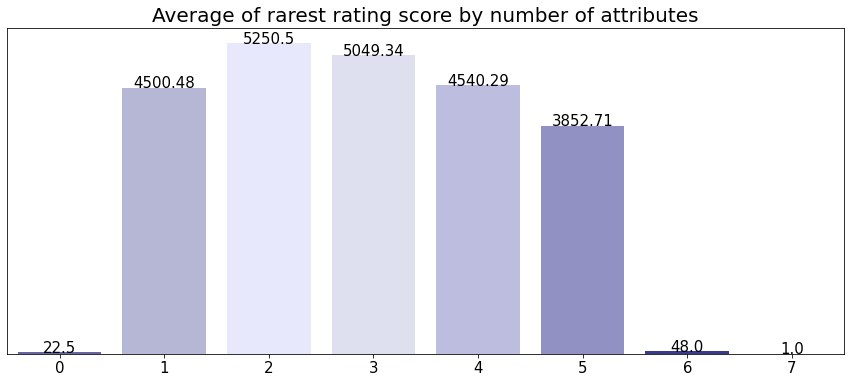

In [107]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="att", y="rarest_rank", data=data, 
                palette=(["#5B5BB2",
                          "#B0B2D9",
                          "#E5E5FF",
                          "#DCDEF2",
                          "#B7B7E5", 
                          "#8989CC",
                          "#2D2D99",
                          "#8487BF"]))

a.set_xticklabels(['0','1','2','3','4','5','6','7'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.att, row.rarest_rank, round(row.rarest_rank,2), color='black', ha="center",fontsize=15)

plt.title("Average of rarest rating score by number of attributes",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('17.png')
plt.show(a)

### Evolution of transactions

In [108]:
try:
    query = """SELECT type, date, amount, punk_id 
    FROM transaction
    WHERE type = 'Bid' OR type = 'Offered' OR type = 'Sold';"""
    df_transactions = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [109]:
df_transactions.head()

,type,date,amount,punk_id
0,Bid,2021-09-01,321.0,0
1,Bid,2021-09-01,320.0,0
2,Bid,2021-08-29,263.0,0
3,Bid,2021-04-11,250.0,0
4,Bid,2021-02-20,100.0,0


In [110]:
df_sold = df_transactions.loc[df_transactions['type'] == 'Sold']
df_sold = df_sold.sort_values(by=['date'])
df_sold = df_sold.reset_index(drop=True)

df_bid = df_transactions.loc[df_transactions['type'] == 'Bid']
df_bid = df_bid.sort_values(by=['date'])
df_bid = df_bid.reset_index(drop=True)

df_offered = df_transactions.loc[df_transactions['type'] == 'Offered']
df_offered = df_offered.sort_values(by=['date'])
df_offered = df_offered.reset_index(drop=True)

In [111]:
df_sold.nlargest(3, 'amount')

,type,date,amount,punk_id
10666,Sold,2021-03-11,4200.0,7804
10669,Sold,2021-03-11,4200.0,3100
19614,Sold,2021-12-09,2500.0,4156


In [112]:
df_bid.nlargest(3, 'amount')

,type,date,amount,punk_id
15152,Bid,2021-03-11,4200.0,3100
17196,Bid,2021-04-02,3100.0,3443
17201,Bid,2021-04-02,3000.0,3443


In [113]:
df_offered.nlargest(3, 'amount')

,type,date,amount,punk_id
93,Offered,2017-06-24,9.000000e+13,6141
31968,Offered,2021-04-07,8.889000e+10,6174
31991,Offered,2021-04-07,8.889000e+10,6754


In [114]:
df_offered['amount'].max()

90000000000000.0

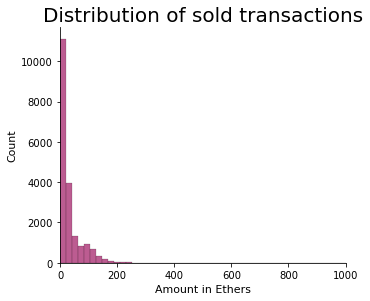

In [115]:
sns.displot(x = df_sold['amount'],bins=200,fill=True, color='#A6266C',height=4,aspect=5/4)
plt.xlim(0, 1000)
plt.title("Distribution of sold transactions",fontsize=20)
plt.xlabel("Amount in Ethers",fontsize=11)
plt.ylabel("Count",fontsize=11)
plt.savefig('18.png',bbox_inches='tight')
plt.show()

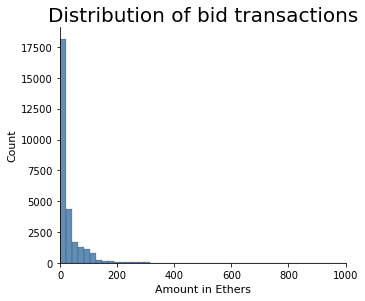

In [116]:
sns.displot(x = df_bid['amount'],bins=200,fill=True, color='#2D689C',height=4,aspect=5/4)
plt.xlim(0, 1000)
plt.title("Distribution of bid transactions",fontsize=20)
plt.xlabel("Amount in Ethers",fontsize=11)
plt.ylabel("Count",fontsize=11)
plt.savefig('19.png',bbox_inches='tight')
plt.show()

### Evolution of transaction types amount

In [117]:
data1 = df_sold.groupby(['date']).count()
data1['date'] = data1.index
data1 = data1.reset_index(drop=True)
data1.head()

,type,amount,punk_id,date
0,20,20,20,2017-06-23
1,22,22,22,2017-06-24
2,13,13,13,2017-06-25
3,18,18,18,2017-06-26
4,36,36,36,2017-06-27


In [118]:
data2 = df_bid.groupby(['date']).count()
data2['date'] = data2.index
data2 = data2.reset_index(drop=True)
data2.head()

,type,amount,punk_id,date
0,32,32,32,2017-06-23
1,26,26,26,2017-06-24
2,685,685,685,2017-06-25
3,1020,1020,1020,2017-06-26
4,113,113,113,2017-06-27


In [119]:
data3 = df_offered.groupby(['date']).count()
data3['date'] = data3.index
data3 = data3.reset_index(drop=True)
data3.head()

,type,amount,punk_id,date
0,1,1,1,2017-02-23
1,1,1,1,2017-03-23
2,39,39,39,2017-06-23
3,240,240,240,2017-06-24
4,104,104,104,2017-06-25


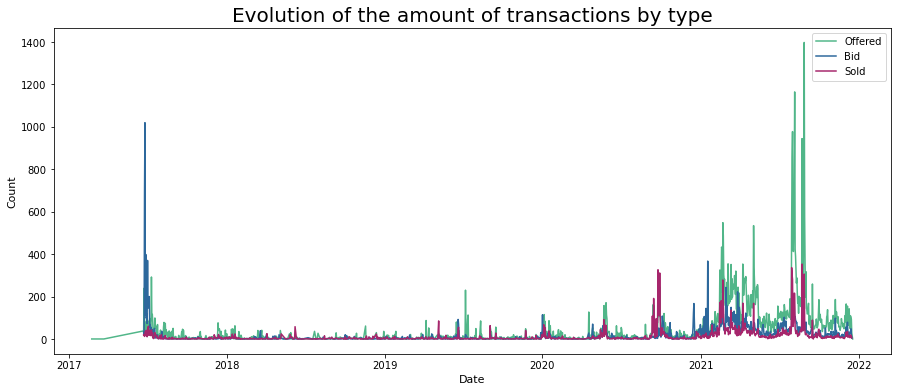

In [120]:
#scatterplot
plt.figure(figsize =(15, 6))
sns.lineplot(x=data3['date'],y=data3['amount'], color='#51B689',label='Offered')
sns.lineplot(x=data2['date'],y=data2['amount'], color='#2D689C',label='Bid')
sns.lineplot(x=data1['date'],y=data1['amount'], color='#A6266C',label='Sold')

plt.title("Evolution of the amount of transactions by type",fontsize=20)
plt.xlabel("Date",fontsize=11)
plt.ylabel("Count",fontsize=11)
plt.savefig('20.png')
plt.show()

In [121]:
data4 = df_sold.groupby(['date']).max()
data4['date'] = data4.index
data4 = data4.reset_index(drop=True)
data4.head()

,type,amount,punk_id,date
0,Sold,0.98,8878,2017-06-23
1,Sold,0.50,9963,2017-06-24
2,Sold,0.21,9439,2017-06-25
3,Sold,0.42,9549,2017-06-26
4,Sold,1.00,9874,2017-06-27


In [122]:
data5 = df_sold.groupby(['date']).min()
data5['date'] = data5.index
data5 = data5.reset_index(drop=True)
data5.head()

,type,amount,punk_id,date
0,Sold,0.00,0,2017-06-23
1,Sold,0.01,1050,2017-06-24
2,Sold,0.05,944,2017-06-25
3,Sold,0.01,1,2017-06-26
4,Sold,0.01,641,2017-06-27


In [123]:
data6 = df_sold.groupby(['date']).mean()
data6['date'] = data6.index
data6 = data6.reset_index(drop=True)
data6.head()

,amount,punk_id,date
0,0.154500,5080.350000,2017-06-23
1,0.194091,4664.090909,2017-06-24
2,0.138462,4552.000000,2017-06-25
3,0.135556,5626.555556,2017-06-26
4,0.222222,4976.944444,2017-06-27


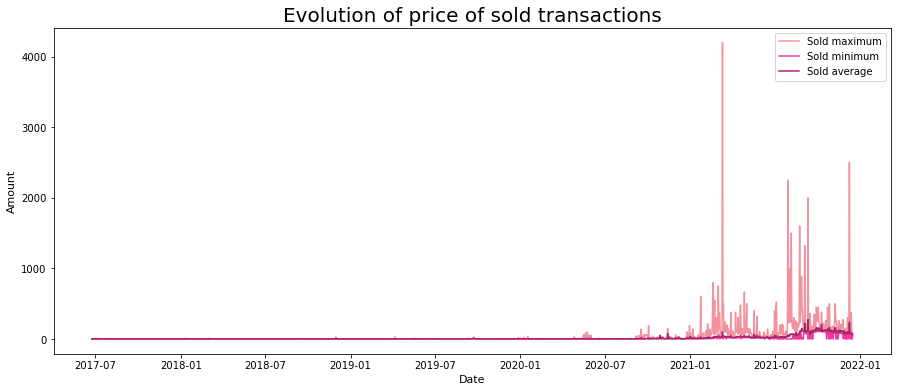

In [124]:
#scatterplot
plt.figure(figsize =(15, 6))

sns.lineplot(x=data4['date'],y=data4['amount'], color='#F2929E',label='Sold maximum')
sns.lineplot(x=data5['date'],y=data5['amount'], color='#F2389E',label='Sold minimum')
sns.lineplot(x=data6['date'],y=data6['amount'], color='#A6266C',label='Sold average')

plt.title("Evolution of price of sold transactions",fontsize=20)
plt.xlabel("Date",fontsize=11)
plt.ylabel("Amount",fontsize=11)
plt.savefig('21.png')
plt.show()

### Distribution of Sold transactions

In [125]:
try:
    query = """SELECT type, date, amount, punk_id 
    FROM transaction
    WHERE type = 'Sold';"""
    df_sold = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [126]:
df_sold = df_sold.sort_values(by=['date'])
df_sold = df_sold.reset_index(drop=True)

In [127]:
len(df_sold['punk_id'])

19702

In [128]:
data = df_sold.drop_duplicates(subset=['punk_id'], keep='first')
len(data['punk_id'])

6500

In [129]:
data.head()

,type,date,amount,punk_id
0,Sold,2017-06-23,0.20,5545
1,Sold,2017-06-23,0.20,4641
3,Sold,2017-06-23,0.25,1841
4,Sold,2017-06-23,0.10,5056
5,Sold,2017-06-23,0.13,8878


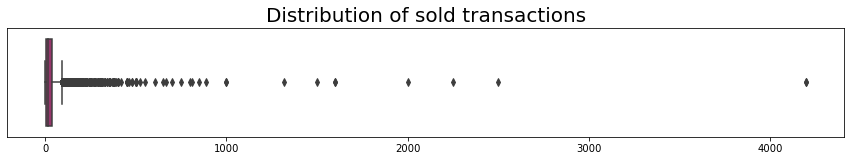

In [130]:
plt.figure(figsize =(15, 2))
a = sns.boxplot(x=df_sold["amount"],color='#A6266C')
a.tick_params(left=False)
plt.title("Distribution of sold transactions",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('22.png',bbox_inches='tight')
plt.show(a)

In [131]:
data["amount"].max()

1320.0

In [132]:
round(data["amount"].median(),2)

2.25

In [133]:
round(data["amount"].mean(),2)

18.55

In [134]:
round(data["amount"].std(),2)

40.76

In [135]:
data["amount"].quantile(0.25)

0.3

In [136]:
df_sold["amount"].quantile(0.95)

120.0

In [137]:
try:
    query = """SELECT type, date, amount, punk_id 
    FROM transaction
    WHERE type = 'Bid';"""
    df_bid = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

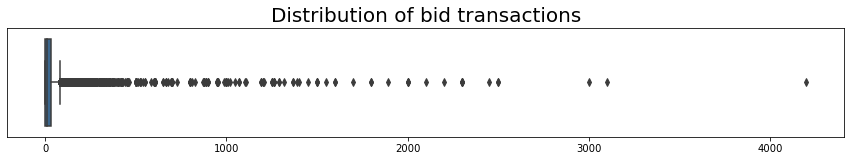

In [138]:
plt.figure(figsize =(15, 2))
a = sns.boxplot(x=df_bid["amount"],color='#2D689C')
a.tick_params(left=False)
plt.title("Distribution of bid transactions",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('23.png',bbox_inches='tight')
plt.show(a)

In [139]:
df_bid["amount"].max()

4200.0

In [140]:
round(df_bid["amount"].median(),2)

10.0

In [141]:
round(df_bid["amount"].mean(),2)

31.8

In [142]:
round(df_bid["amount"].std(),2)

95.23

In [143]:
df_bid["amount"].quantile(0.25)

0.33

In [144]:
df_bid["amount"].quantile(0.75)

32.5

In [145]:
try:
    query = """SELECT type, date, amount, punk_id 
    FROM transaction
    WHERE type = 'Offered';"""
    df_offered = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [146]:
df_offered.loc[df_offered['amount'] == 90000000000000.0]

,type,date,amount,punk_id
39712,Offered,2017-06-24,9.000000e+13,6141


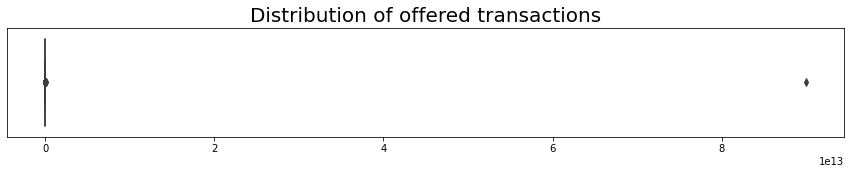

In [147]:
plt.figure(figsize =(15, 2))
a = sns.boxplot(x=df_offered["amount"],color='#2D689C')
a.tick_params(left=False)
plt.title("Distribution of offered transactions",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('24.png',bbox_inches='tight')
plt.show(a)

In [148]:
df_offered["amount"].max()

90000000000000.0

In [149]:
round(df_offered["amount"].median(),2)

35.0

In [150]:
round(df_offered["amount"].mean(),2)

1269115321.01

In [151]:
round(df_offered["amount"].std(),2)

337616923921.81

In [152]:
df_offered["amount"].quantile(0.25)

12.754999999999999

In [153]:
df_offered["amount"].quantile(0.95)

275.0

### Proportion of Sold transactions by type

In [154]:
try:
    query = """
    SELECT type, date, amount, punk_id, type_id, skin_id 
    FROM transaction
    LEFT JOIN punk ON transaction.punk_id = punk.id
    WHERE type = 'Sold';"""
    df_proportion = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [155]:
df_proportion.head()

,type,date,amount,punk_id,type_id,skin_id
0,Sold,2018-11-30,25.00,0,3,6
1,Sold,2017-07-07,1.60,0,3,6
2,Sold,2017-06-23,0.98,0,3,6
3,Sold,2020-11-30,60.00,1,4,4
4,Sold,2019-04-06,31.00,1,4,4


In [156]:
df_proportion = df_proportion.groupby(['type_id']).count()
df_proportion['type_id'] = df_proportion.index
df_proportion = df_proportion.reset_index(drop=True)
df_proportion.head()

,type,date,amount,punk_id,skin_id,type_id
0,10,10,10,10,10,0
1,34,34,34,34,34,1
2,105,105,105,105,105,2
3,6313,6313,6313,6313,6313,3
4,13240,13240,13240,13240,13240,4


In [157]:
df_proportion['percent'] = round((df_proportion['amount'] / df_proportion['amount'].sum()) * 100,2)
df_proportion

,type,date,amount,punk_id,skin_id,type_id,percent
0,10,10,10,10,10,0,0.05
1,34,34,34,34,34,1,0.17
2,105,105,105,105,105,2,0.53
3,6313,6313,6313,6313,6313,3,32.04
4,13240,13240,13240,13240,13240,4,67.20


In [158]:
list(df_proportion['percent'])

[0.05, 0.17, 0.53, 32.04, 67.2]

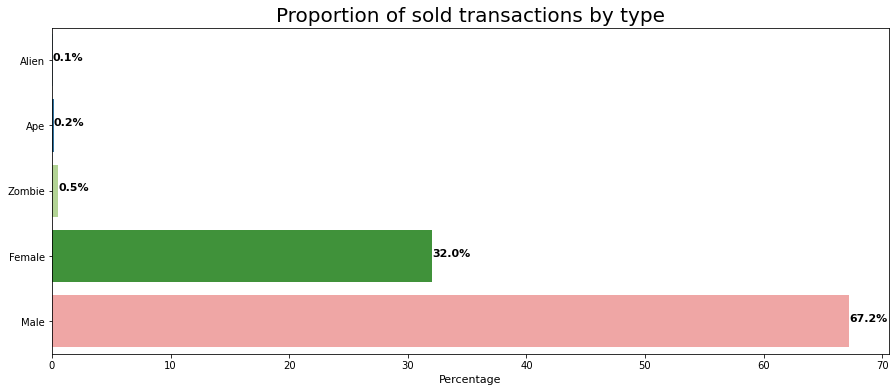

In [159]:
bar,ax = plt.subplots(figsize=(15,6))
labels = ['Alien','Ape','Zombie','Female','Male']
ax = sns.barplot(x="percent", y=labels, data=df_proportion, ci=None, palette="Paired",orient='h' )
ax.set_title("Proportion of sold transactions by type", fontsize=20)
ax.set_xlabel ("Percentage", fontsize=11)
ax.set_ylabel ("")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold', fontsize=11)
bar.savefig("26.png");

### Proportion of Sold transactions by skin

In [160]:
try:
    query = """
    SELECT type, date, amount, punk_id, type_id, skin_id 
    FROM transaction
    LEFT JOIN punk ON transaction.punk_id = punk.id
    WHERE type = 'Sold';"""
    df_skin = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [161]:
df_skin = df_skin.groupby(['skin_id']).count()
df_skin['skin_id'] = df_skin.index
df_skin = df_skin.reset_index(drop=True)
df_skin['percent'] = round((df_skin['amount'] / df_skin['amount'].sum()) * 100,2)
df_skin.head()

,type,date,amount,punk_id,type_id,skin_id,percent
0,10,10,10,10,10,0,0.05
1,34,34,34,34,34,1,0.17
2,105,105,105,105,105,2,0.53
3,1760,1760,1760,1760,1760,3,8.93
4,6260,6260,6260,6260,6260,4,31.77


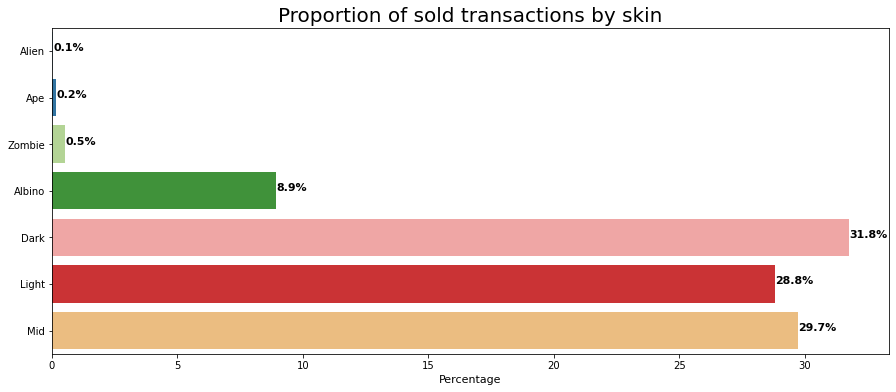

In [162]:
bar,ax = plt.subplots(figsize=(15,6))
labels = ['Alien','Ape','Zombie','Albino','Dark','Light','Mid']
ax = sns.barplot(x="percent", y=labels, data=df_skin, ci=None, palette="Paired",orient='h' )
ax.set_title("Proportion of sold transactions by skin", fontsize=20)
ax.set_xlabel ("Percentage", fontsize=11)
ax.set_ylabel ("")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold', fontsize=11)
bar.savefig("27.png");

### Proportion of Sold transactions by attribute

In [163]:
try:
    query = """
    SELECT type, date, amount, punk_id, type_id, skin_id 
    FROM transaction
    LEFT JOIN punk ON transaction.punk_id = punk.id
    WHERE type = 'Sold';"""
    df_at = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [164]:
df_at.head(5)

,type,date,amount,punk_id,type_id,skin_id
0,Sold,2018-11-30,25.00,0,3,6
1,Sold,2017-07-07,1.60,0,3,6
2,Sold,2017-06-23,0.98,0,3,6
3,Sold,2020-11-30,60.00,1,4,4
4,Sold,2019-04-06,31.00,1,4,4


In [165]:
df_attributes.head(5)

,total_att,punk_id
0,3,0
1,2,1
2,1,2
3,3,3
4,4,4


In [166]:
df_att_tran = pd.merge(df_at, df_attributes, on=["punk_id"])
df_att_tran.head(5)

,type,date,amount,punk_id,type_id,skin_id,total_att
0,Sold,2018-11-30,25.00,0,3,6,3
1,Sold,2017-07-07,1.60,0,3,6,3
2,Sold,2017-06-23,0.98,0,3,6,3
3,Sold,2020-11-30,60.00,1,4,4,2
4,Sold,2019-04-06,31.00,1,4,4,2


In [167]:
df_att_tran = df_att_tran.groupby(['total_att']).count()
df_att_tran['total_att'] = df_att_tran.index
df_att_tran = df_att_tran.reset_index(drop=True)
df_att_tran['percent'] = round((df_att_tran['amount'] / df_att_tran['amount'].sum()) * 100,2)
df_att_tran.head()

,type,date,amount,punk_id,type_id,skin_id,total_att,percent
0,11,11,11,11,11,11,0,0.06
1,267,267,267,267,267,267,1,1.36
2,7093,7093,7093,7093,7093,7093,2,36.00
3,9390,9390,9390,9390,9390,9390,3,47.66
4,2647,2647,2647,2647,2647,2647,4,13.44


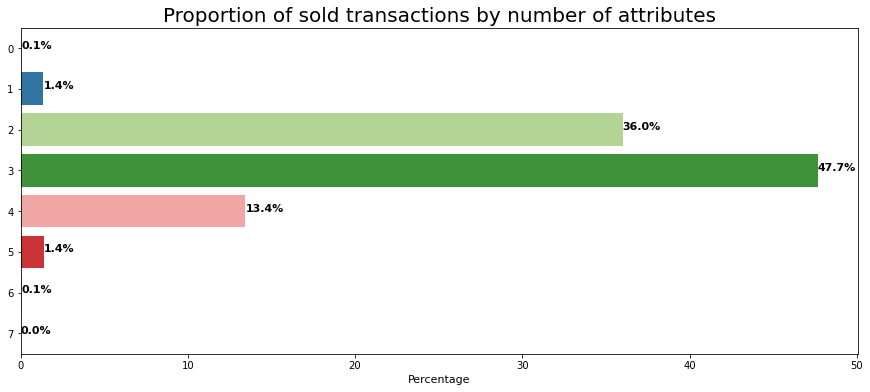

In [168]:
bar,ax = plt.subplots(figsize=(15,6))
labels = ['0','1','2','3','4','5','6','7']
ax = sns.barplot(x="percent", y=labels, data=df_att_tran, ci=None, palette="Paired",orient='h' )
ax.set_title("Proportion of sold transactions by number of attributes", fontsize=20)
ax.set_xlabel ("Percentage", fontsize=11)
ax.set_ylabel ("")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold', fontsize=11)
bar.savefig("28.png");

### Evolution of Sold price of punk by type

In [169]:
try:
    query = """SELECT transaction.type, transaction.date, transaction.amount, transaction.punk_id, punk.type_id 
    FROM transaction
    INNER JOIN punk ON punk.id=transaction.punk_id
    WHERE type = 'Sold';"""
    df_type_evolution = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [170]:
df1 = df_type_evolution.loc[df_type_evolution['type_id'] == 0]
df1 = df1.sort_values(by=['date'])
df1 = df1.reset_index(drop=True)

df2 = df_type_evolution.loc[df_type_evolution['type_id'] == 1]
df2 = df2.sort_values(by=['date'])
df2 = df2.reset_index(drop=True)

df3 = df_type_evolution.loc[df_type_evolution['type_id'] == 2]
df3 = df3.sort_values(by=['date'])
df3 = df3.reset_index(drop=True)

df4 = df_type_evolution.loc[df_type_evolution['type_id'] == 3]
df4 = df4.sort_values(by=['date'])
df4 = df4.reset_index(drop=True)

df5 = df_type_evolution.loc[df_type_evolution['type_id'] == 4]
df5 = df5.sort_values(by=['date'])
df5 = df5.reset_index(drop=True)

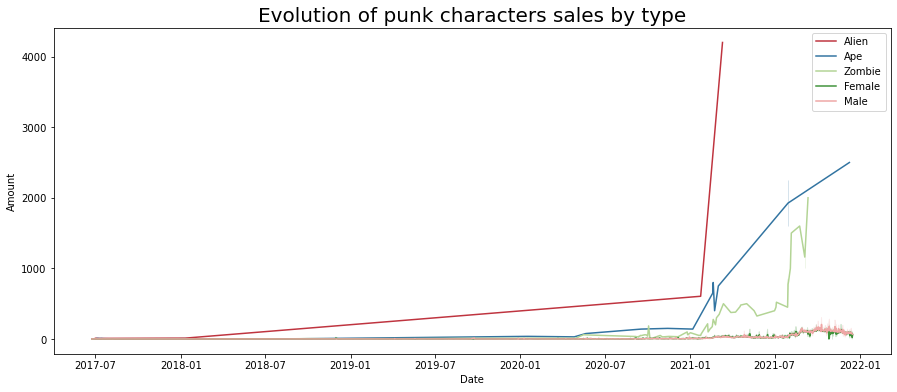

In [171]:
#scatterplot
plt.figure(figsize =(15, 6))
sns.lineplot(x=df1['date'],y=df1['amount'], color='#BF343F',label='Alien')
sns.lineplot(x=df2['date'],y=df2['amount'], color='#3274A1',label='Ape')
sns.lineplot(x=df3['date'],y=df3['amount'], color='#B3D495',label='Zombie')
sns.lineplot(x=df4['date'],y=df4['amount'], color='#40923A',label='Female')
sns.lineplot(x=df5['date'],y=df5['amount'], color='#EFA6A5',label='Male')

plt.title("Evolution of punk characters sales by type",fontsize=20)
plt.xlabel("Date")
plt.ylabel("Amount")
plt.savefig('29.png')
plt.show()

### Evolution of Sold price and volume

In [172]:
try:
    query = """SELECT type, date, amount, punk_id 
    FROM transaction;"""
    df_transactions = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [173]:
try:
    query = """SELECT type, date, amount, punk_id 
    FROM transaction
    WHERE type = 'Sold';"""
    df_sold = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [174]:
df1 = df_transactions.groupby(['date']).count()
df1['date'] = df1.index
df1 = df1.reset_index(drop=True)
df1.head()

,type,amount,punk_id,date
0,1,1,1,2017-02-23
1,1,1,1,2017-03-23
2,10094,10094,10094,2017-06-23
3,315,315,315,2017-06-24
4,1013,1013,1013,2017-06-25


In [175]:
df2 = df_sold.groupby(['date']).sum()
df2['date'] = df2.index
df2 = df2.reset_index(drop=True)
df2.head()

,amount,punk_id,date
0,3.09,101607,2017-06-23
1,4.27,102610,2017-06-24
2,1.80,59176,2017-06-25
3,2.44,101278,2017-06-26
4,8.00,179170,2017-06-27


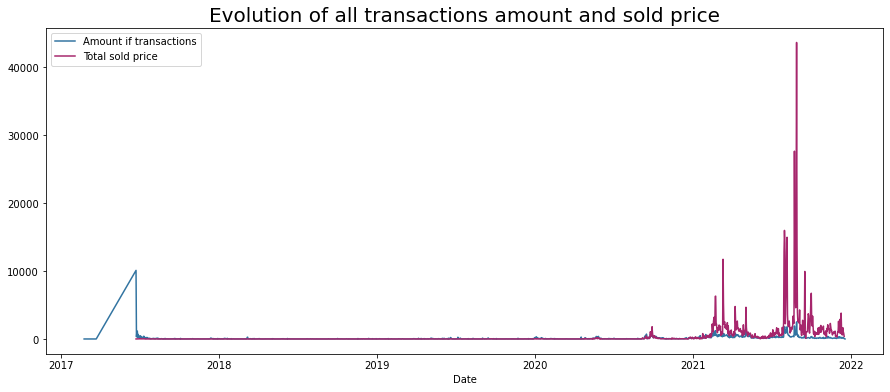

In [176]:
#scatterplot
plt.figure(figsize =(15, 6))
sns.lineplot(x=df1['date'],y=df1['amount'], color='#3274A1',label='Amount if transactions')
sns.lineplot(x=df2['date'],y=df2['amount'], color='#A6266C',label='Total sold price')

plt.title("Evolution of all transactions amount and sold price",fontsize=20)
plt.xlabel("Date")
plt.ylabel("")
plt.savefig('30.png')
plt.show()